#### Research Question :
Which hospital ownership provides a better service by looking at each rating as well as overall rating

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
hos_merged = pd.read_csv("../Cleaned_Data/Hospital Ratings Merged.csv")

In [6]:
# grouping and replacing government and voluntary ownership hospital values
gov_rep = hos_merged.replace(to_replace = ["Government - Federal","Government - Hospital District or Authority", "Government - Local","Government - State"], value="Government")
prop_rep = gov_rep.replace(to_replace = ["Voluntary non-profit - Church","Voluntary non-profit - Other","Voluntary non-profit - Private"], value = "Voluntary")             
new_df = prop_rep.drop(prop_rep[prop_rep["Hospital Ownership"] == "Physician"].index)
grouped_hos_owner = new_df.groupby(["Hospital Ownership"])

In [8]:
prop_rep["Hospital Ownership"].value_counts()
grouped_hos_owner["Hospital Ownership"].value_counts()

Hospital Ownership  Hospital Ownership
Government          Government             45
Proprietary         Proprietary            69
Voluntary           Voluntary             177
Name: Hospital Ownership, dtype: int64

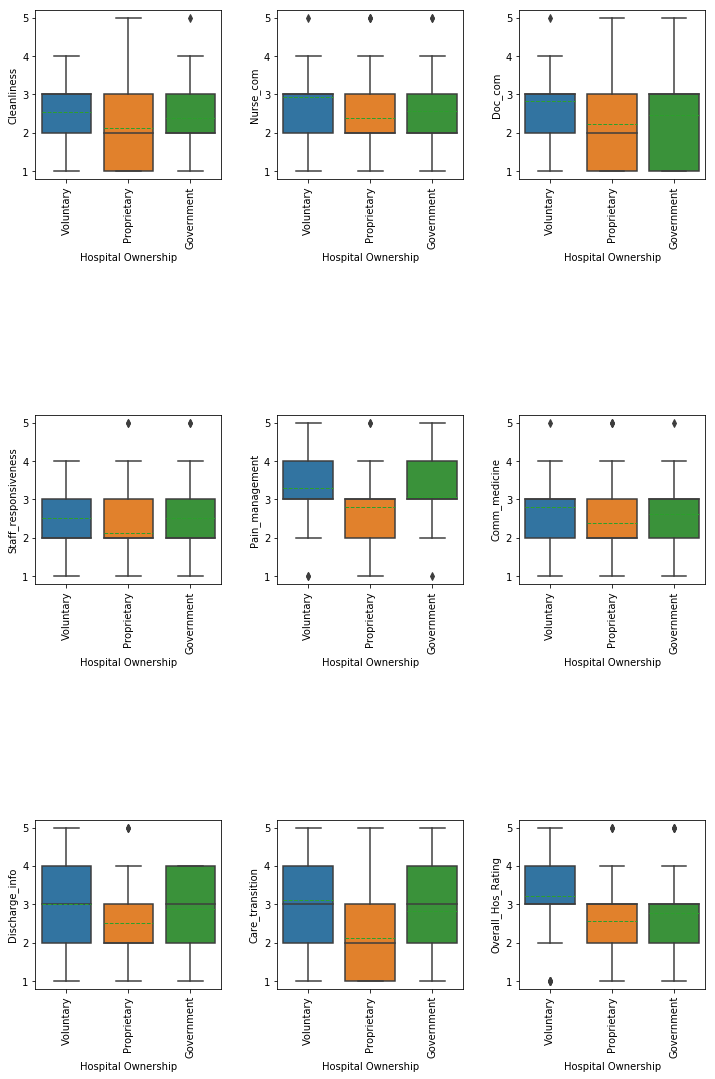

In [12]:
#Getting boxplot for each hospital ownership
fig = plt.figure(figsize=(12,18))
fig.subplots_adjust(hspace=1.4, wspace=.3)
for idx, col in enumerate(new_df.columns[1:10]):
    fig.add_subplot(3, 3, idx+1)
    sns.boxplot(x=new_df['Hospital Ownership'], y=new_df[col], data=new_df, meanline=True, showmeans=True)
    plt.xticks(rotation=90)
plt.savefig("HospitalType_Rating_BoxPlot_revised.png", bbox_inches="tight")
plt.show()

The above graphs indicates that, generally speaking, the voluntary hospitals provide a better service compared to the others. Graphs 1 to 8 compare the voluntary hospitals' rating to that of others with respect to each particular feature. These graphs show that voluntary hospitals generally provide a better service in terms of both overall and feature-based service. This conclusion could make sense because we generally expect to see a better service by a voluntary organization.